## 1. Import Basic Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset into a dataframe
df = pd.read_csv('age_of_marriage_data.csv')
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


## 2. Data Cleaning and EDA

### 2.1 Data Preprocessing

In [3]:
#First we'll remove the id column since it will not be of any use to our model
df.drop('id',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2538 non-null   object 
 1   height           2449 non-null   object 
 2   religion         1932 non-null   object 
 3   caste            2425 non-null   object 
 4   mother_tongue    2403 non-null   object 
 5   profession       2237 non-null   object 
 6   location         2412 non-null   object 
 7   country          2551 non-null   object 
 8   age_of_marriage  2548 non-null   float64
dtypes: float64(1), object(8)
memory usage: 180.6+ KB


Our dataset contains only categorical features except for the target variable which is a continuous feature

In [5]:
df.describe(include='all')

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
count,2538,2449,1932,2425,2403,2237,2412,2551,2548.000000
unique,2,28,5,42,27,86,536,29,NaN
top,male,"5'3""",Hindu,others,Hindi,Not Specified,Mumbai,India,NaN
freq,1338,229,1576,493,508,264,213,2246,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.648352
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.802414
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000


In [6]:
df.shape

(2567, 9)

In [7]:
#height column is of type string, therfore we will have to convert this feature to numeric. We will extract the feet and inches
height_list = df['height'].to_list()
feet = list()
inches = list()
for height in height_list:
    if type(height)==float: #if data is nan, simply append to the list
        feet.append(height)
        inches.append(height)
    else:
        feet.append(int(height[0]))
        inches.append(int(height[2:-1]))

In [8]:
df['Height_Feet'] = feet
df['Height_Inches'] = inches

In [9]:
#drop the old height column and convert height to Cm
df.drop('height',axis=1,inplace=True)
df['Height'] = df['Height_Feet']*30.48+df['Height_Inches']*2.54

In [10]:
df.drop(['Height_Feet','Height_Inches'],axis=1,inplace=True)
df.head()

,gender,religion,caste,mother_tongue,profession,location,country,age_of_marriage,Height
0,female,NaN,others,Telugu,NaN,London,United Kingdom,21.0,162.56
1,male,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,170.18
2,male,Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,170.18
3,female,Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,152.40
4,male,Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,165.10


### 2.2 Missing Data

In [11]:
#Now that we have cleaned the dataset, let us look at missing values in each feature
for feature in df.columns:
    print(feature,'has',df[feature].isnull().sum(),'missing values')

gender has 29 missing values
religion has 635 missing values
caste has 142 missing values
mother_tongue has 164 missing values
profession has 330 missing values
location has 155 missing values
country has 16 missing values
age_of_marriage has 19 missing values
Height has 118 missing values


As we can see that there are lot of missing values in our dataset. We'll have to use some imputation technique or drop the missing records entirely.

### 2.3 Numerical Features

In [12]:
#Let's look at the numerical features present in the dataset
numerical_features = ['Height','age_of_marriage']
df[numerical_features].head()

,Height,age_of_marriage
0,162.56,21.0
1,170.18,32.0
2,170.18,32.0
3,152.40,30.0
4,165.10,30.0


c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


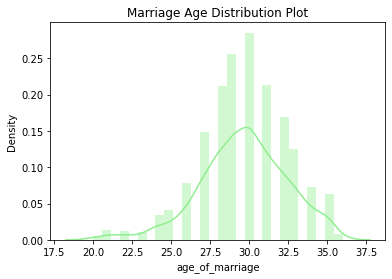

In [13]:
#Let's see the distribution of our target variable
sns.distplot(df['age_of_marriage'],color='lightgreen')
plt.title('Marriage Age Distribution Plot')
plt.show()

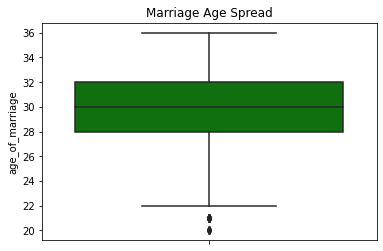

In [14]:
sns.boxplot(y=df['age_of_marriage'],color='green')
plt.title('Marriage Age Spread')
plt.show()

The target variable almost follows a gaussian distribution and there are very few outliers present.

In [15]:
print(df['age_of_marriage'].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]))

count    2548.000000
mean       29.648352
std         2.802414
min        20.000000
25%        28.000000
50%        30.000000
75%        32.000000
85%        33.000000
90%        33.000000
100%       36.000000
max        36.000000
Name: age_of_marriage, dtype: float64


**Observations:** 85% of the people got married before turning 33 and remaining 15% got married between 33-36 years of age.

Text(0, 0.5, 'Marriage Age')

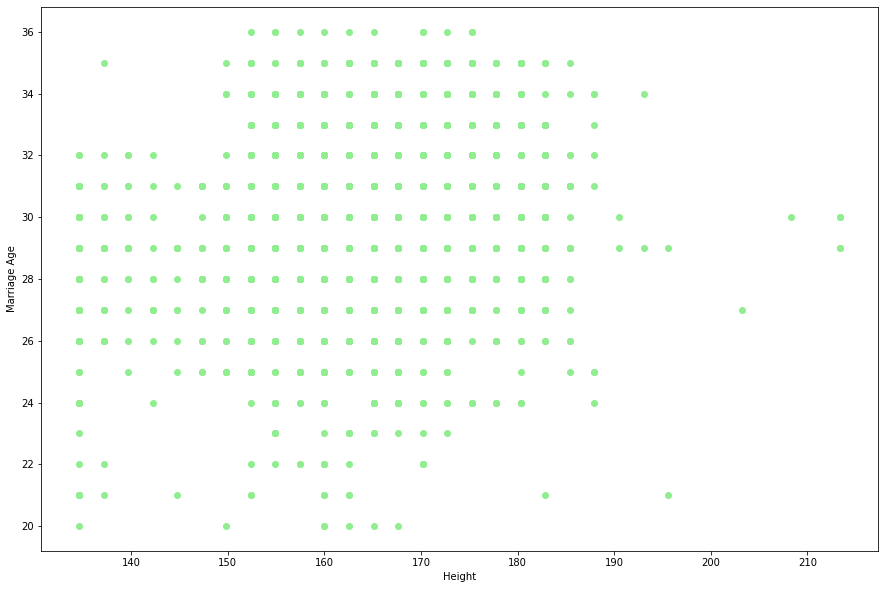

In [16]:
#Scatter plots with respect to target variable
plt.figure(figsize=(15,10))
plt.scatter(df['Height'],df['age_of_marriage'],color='lightgreen')
plt.xlabel('Height')
plt.ylabel('Marriage Age')

**Observations:** Height doesn't seem to have much affect on marriage age.

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Height')

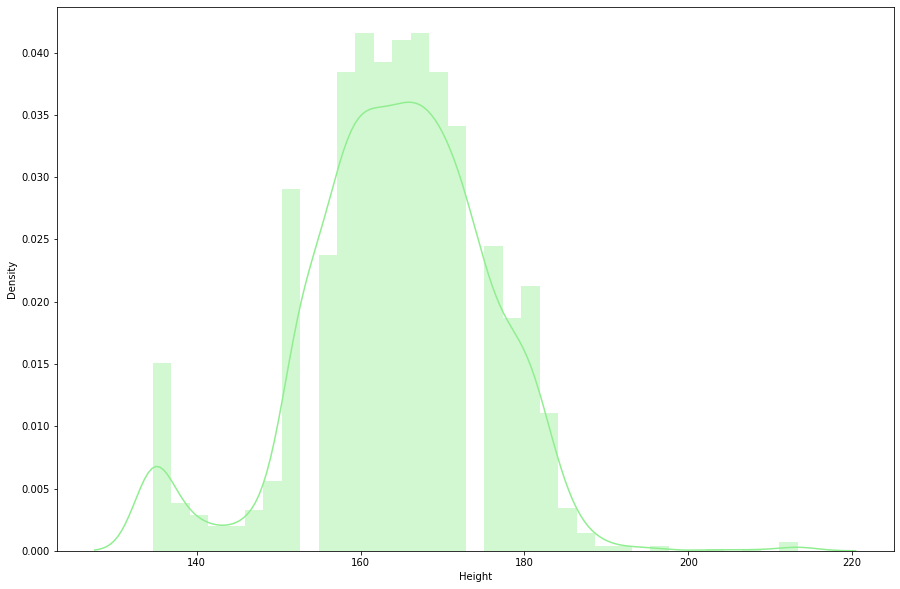

In [17]:
#Distribution Plot
plt.figure(figsize=(15,10))
sns.distplot(df['Height'],color='lightgreen')
plt.xlabel('Height')

### 2.4 Categorical Features

In [18]:
cat_features = ['gender','religion','caste','mother_tongue','profession','location','country']
df[cat_features].head()    

,gender,religion,caste,mother_tongue,profession,location,country
0,female,NaN,others,Telugu,NaN,London,United Kingdom
1,male,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA
2,male,Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India
3,female,Hindu,Thakur,Hindi,Architect,Mumbai,India
4,male,Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India


In [19]:
#Let's see how many categories are present in each feature
for feature in cat_features:
    print(feature,'has',len(df[feature].unique()),'categories')

gender has 3 categories
religion has 6 categories
caste has 43 categories
mother_tongue has 28 categories
profession has 87 categories
location has 537 categories
country has 30 categories


In [20]:
#Let's look at each category in the features
for feature in cat_features:
    print(feature,':',df[feature].unique())

gender : ['female' 'male' nan]
religion : [nan 'Jain' 'Hindu' 'Christian' 'Muslim' 'Sikh']
caste : ['others' ' Shwetamber' ' Brahmin' ' Thakur' ' Born Again' ' Valmiki'
 ' Rajput - Lodhi' ' Bhatia' ' Billava' ' Vanniyar' ' Agri' ' Marthoma'
 ' Ahom' ' Baishnab' ' Roman Catholic' ' Lingayath' ' Kalita' ' Vaishnav'
 nan ' Sahu' ' Baishya' ' Memon' ' Agarwal' ' Panchal' ' Baidya'
 ' Kaibarta' ' Sindhi-Sakkhar' ' Viswabrahmin' ' Patel'
 ' Scheduled Caste (SC)' ' Kshatriya' ' Ramdasia' ' Khatri'
 ' OBC - Barber/Naayee' ' Baniya' ' Goud' ' Balija' ' Arora' ' Kayastha'
 ' Gursikh' ' Arya Vysya' ' Bhandari' ' Saini']
mother_tongue : ['Telugu' 'Gujarati' 'Hindi' 'Malayalam' 'Punjabi' 'Tulu' 'Tamil'
 'Bengali' nan 'Marathi' 'Marwari' 'Assamese' 'Kannada' 'Sindhi' 'English'
 'Odia' 'Konkani' 'Chattisgarhi' 'Kutchi' 'Bhojpuri' 'Urdu' 'Nepali'
 'Haryanavi' 'Other' 'Rajasthani' 'Manipuri' 'Aka' 'Kashmiri']
profession : [nan 'Doctor / Healthcare Professional' 'Entrepreneurs / Business '
 'Architect' 

As you can see there are a number of categories in each feature. We will have to come up with some encoding technique, which we will be doing in feature engineering.

In [21]:
for feature in cat_features:
    print(df[feature].value_counts())
    print('------------------------------------------')

male      1338
female    1200
Name: gender, dtype: int64
------------------------------------------
Hindu        1576
Sikh          150
Christian     120
Jain           46
Muslim         40
Name: religion, dtype: int64
------------------------------------------
others                   493
 Brahmin                 252
 Kshatriya                70
 Lingayath                65
 Agarwal                  53
 Shwetamber               46
 Patel                    42
 Baniya                   41
 Bhandari                 41
 Arora                    41
 Vaishnav                 41
 Baishya                  40
 Kaibarta                 40
 Gursikh                  40
 Arya Vysya               40
 Khatri                   40
 Goud                     40
 Saini                    40
 Roman Catholic           40
 Kalita                   40
 Billava                  40
 Panchal                  40
 Baishnab                 40
 Thakur                   40
 Ahom                     40
 Balija      

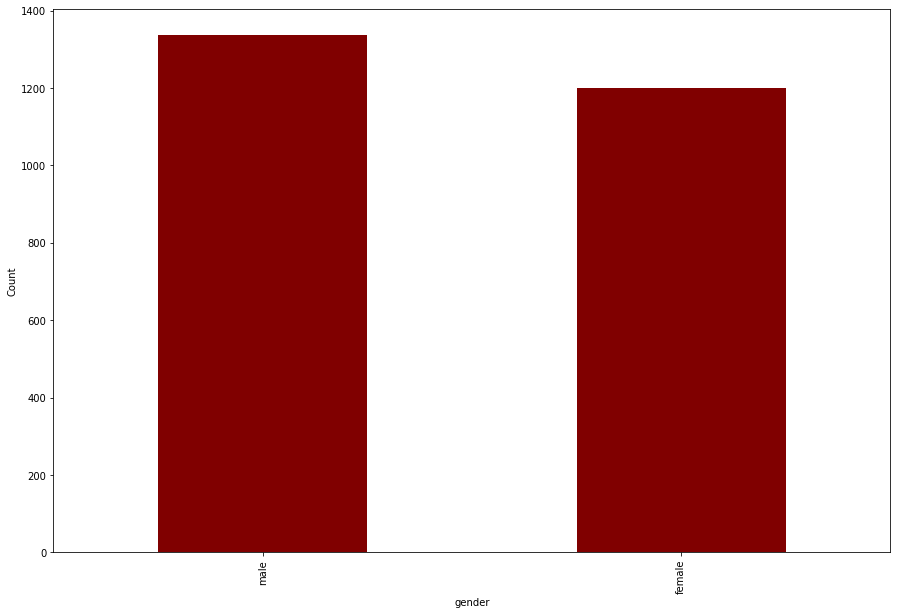

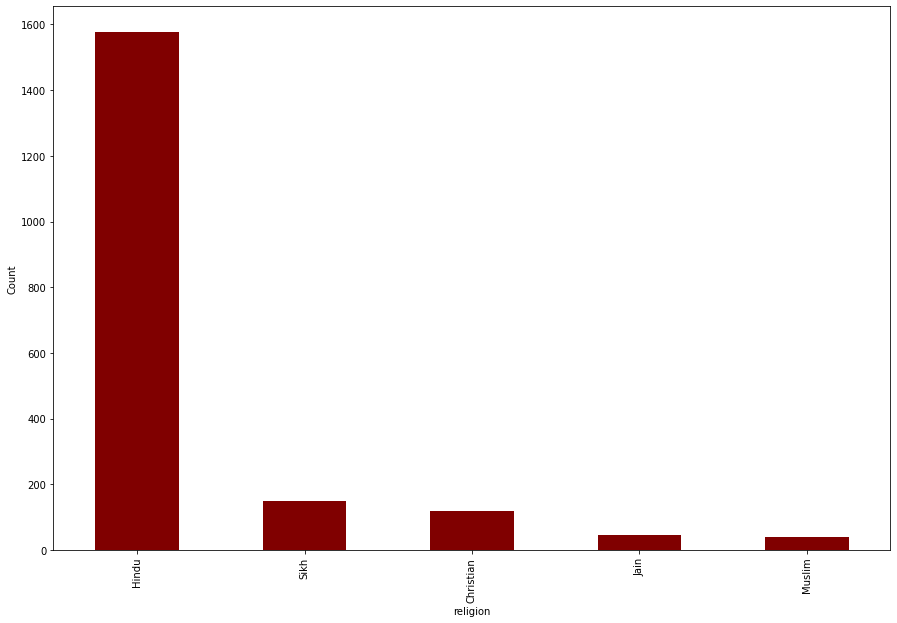

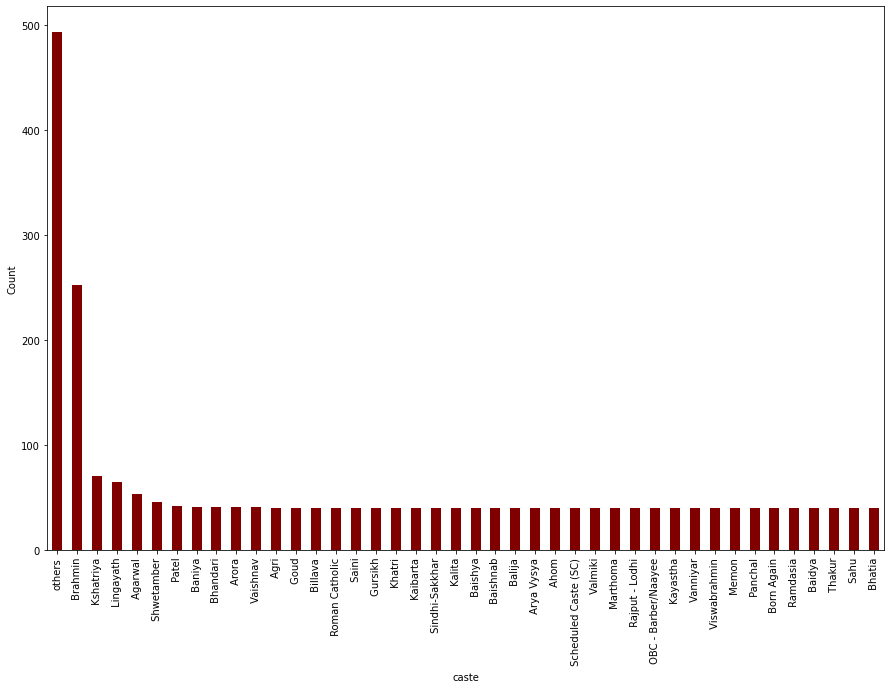

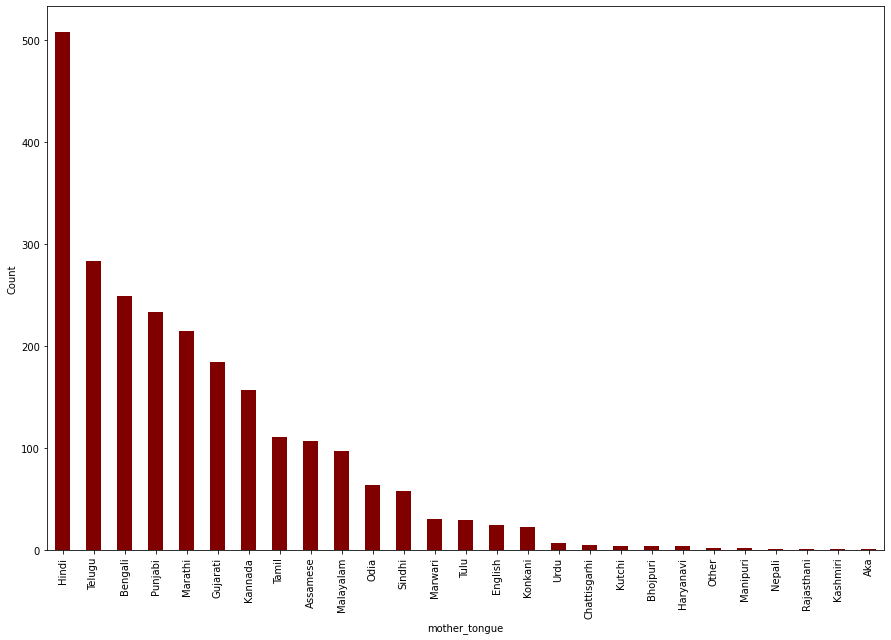

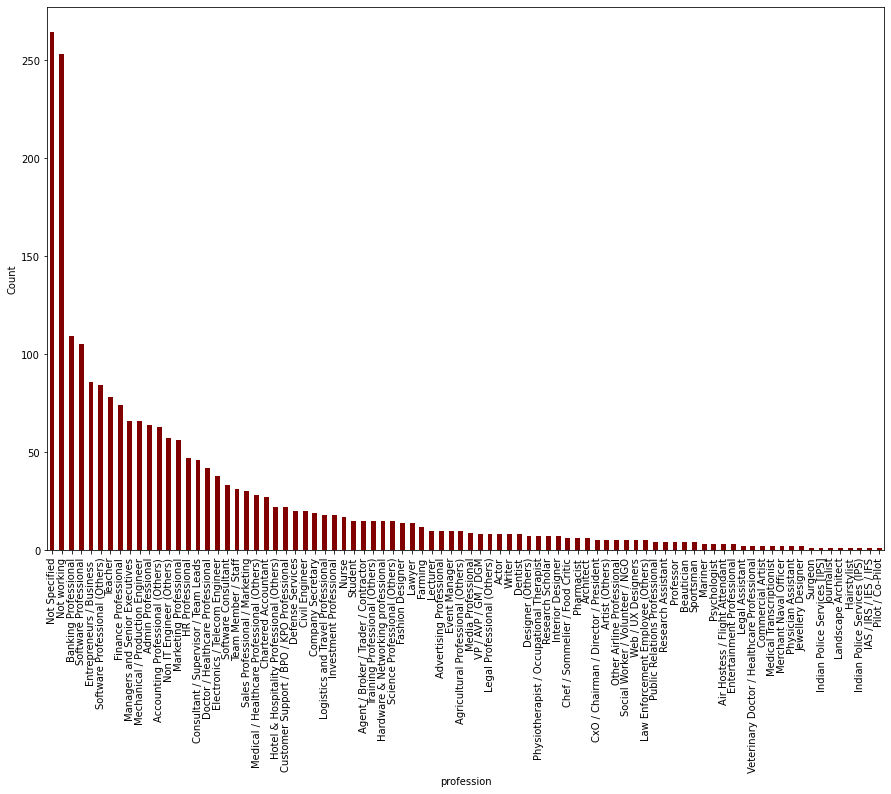

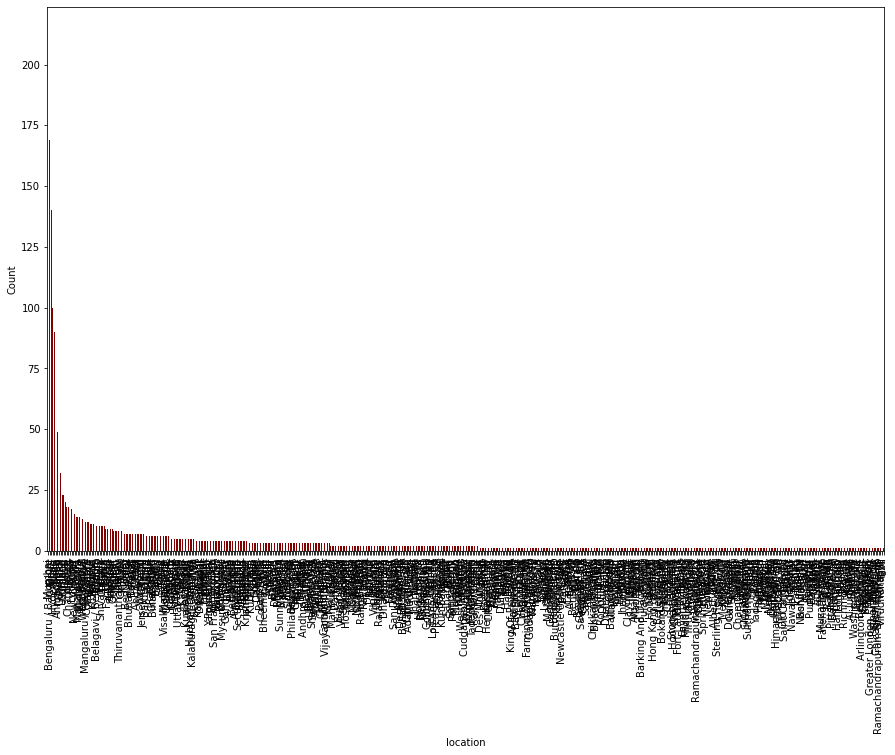

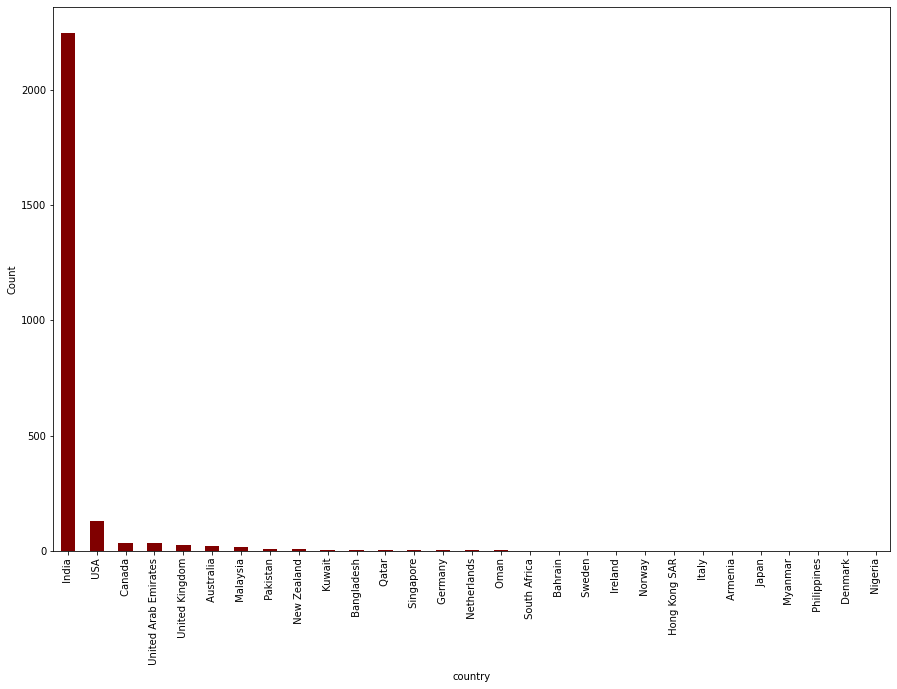

In [22]:
#Let's use barplots for better visualization
for feature in cat_features:
    plt.figure(figsize=(15,10))
    df[feature].sort_values(ascending=False).value_counts().plot.bar(color='maroon')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**Observations**
1. Gender distribution is almost equal.
2. Most of the people belonged to Hindu religion (approx. 1600).
3. Maximum number were of Brahmin caste.
4. Maximum number of people had mother tongue as Hindi, followed by Telugu.
5. Maximum number of people are working in Banks and Software firms.
6. Most of the people were residing in India at the time of marriage.

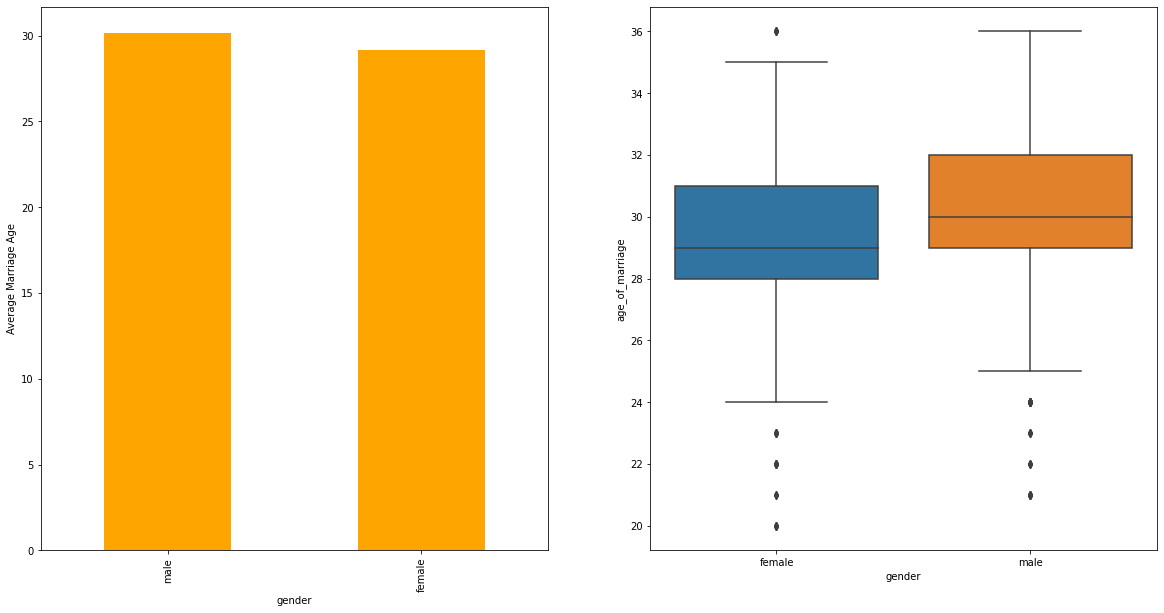

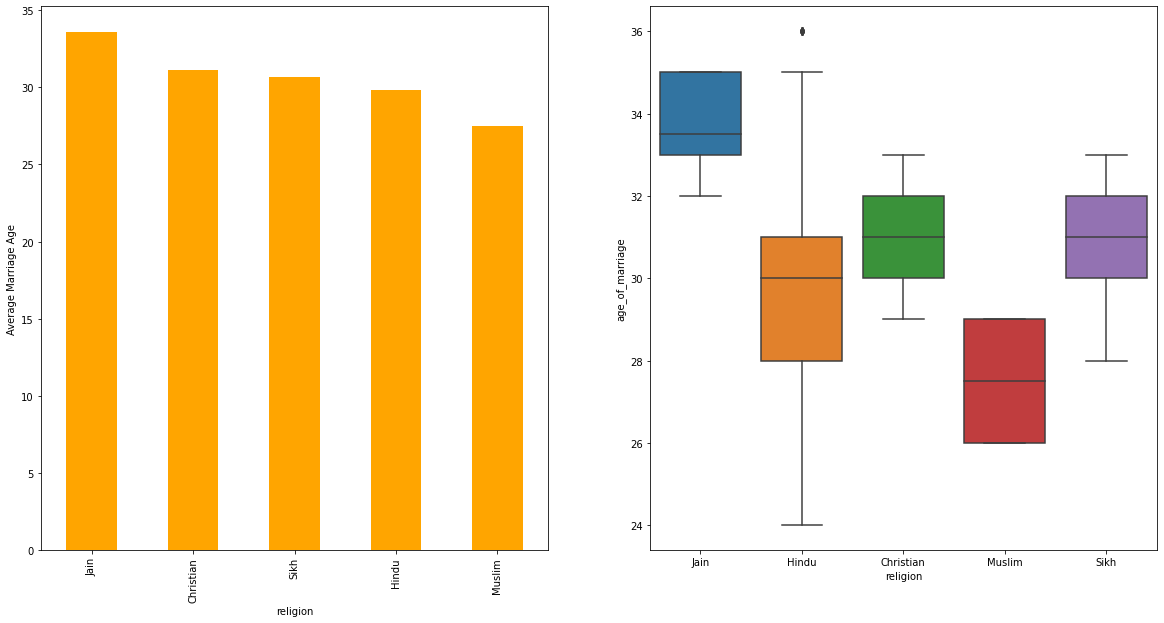

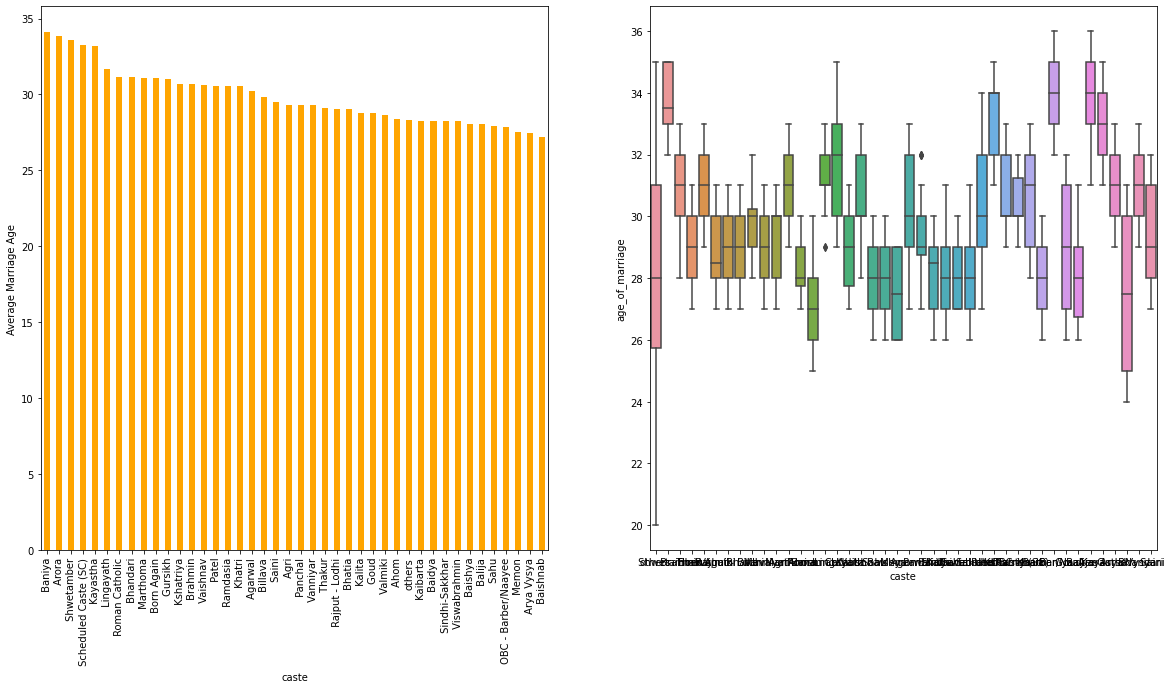

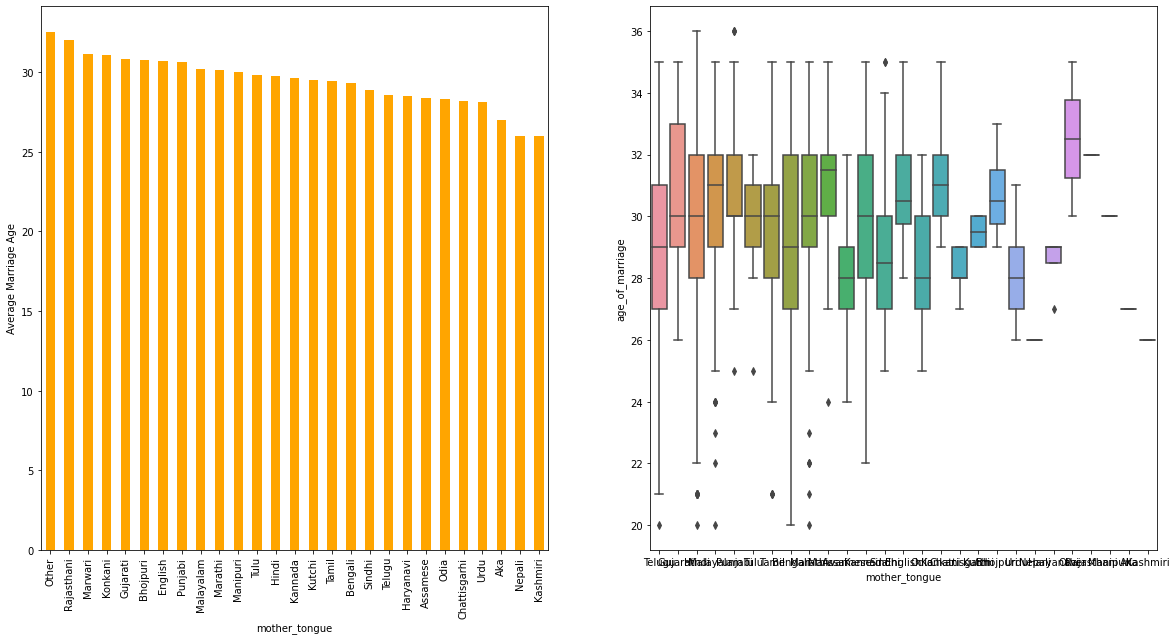

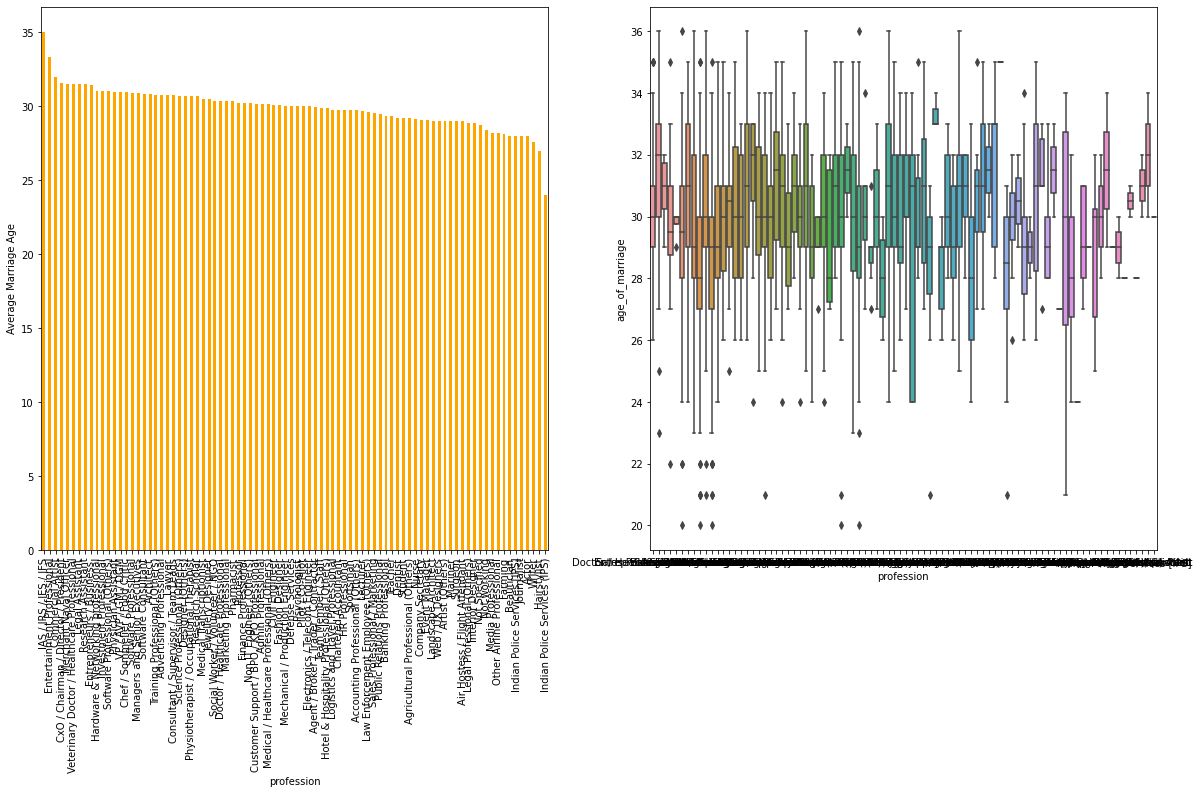

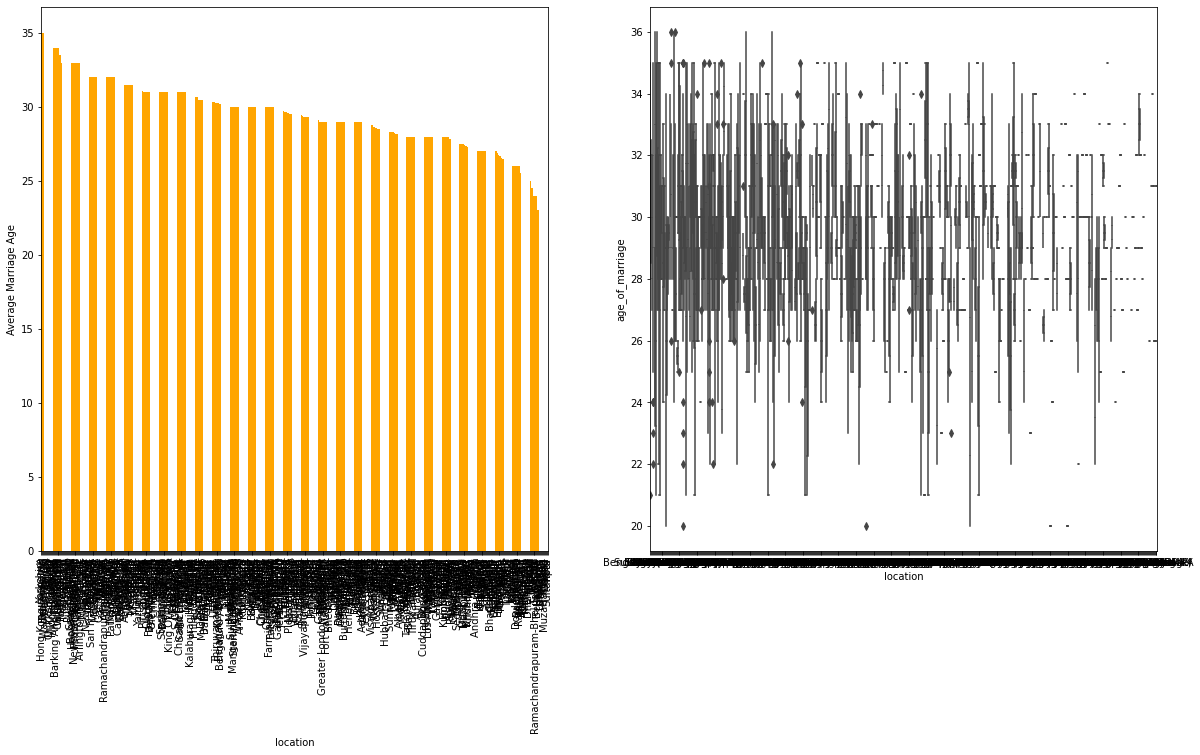

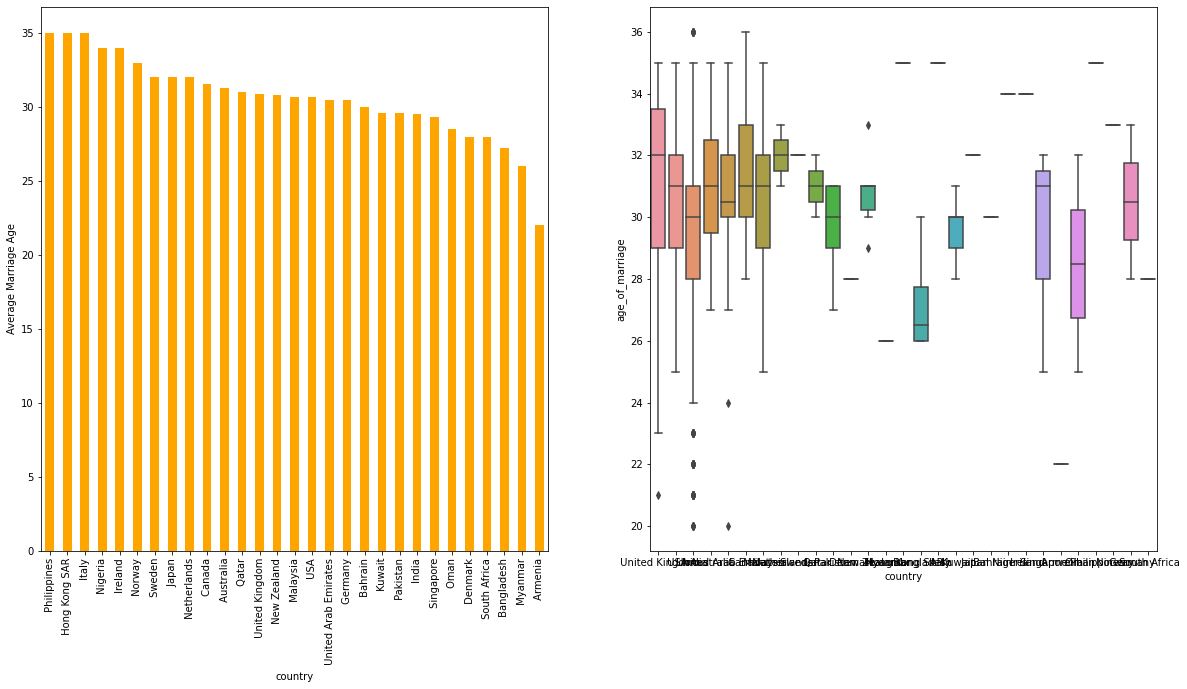

In [23]:
#Let' see how the categorical features affect our target variable with the help of barplots and boxplots
for feature in cat_features:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    df.groupby(feature)['age_of_marriage'].mean().sort_values(ascending=False).plot.bar(color='orange')
    plt.xlabel(feature)
    plt.ylabel('Average Marriage Age')
    plt.subplot(1,2,2)
    sns.boxplot(x=feature,y='age_of_marriage',data=df)
    plt.show()

**Observations**
1. On average females seems to marry by 29 and males by 30
2. On average Jain's seem to marry by 33

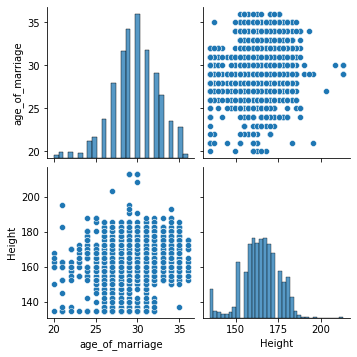

In [24]:
#Pairplot
sns.pairplot(df)

## 3. Feature Engineering

### 3.1 Handling Missing Values

In [25]:
features = df.columns
for feature in features:
    print(feature,'has',df[feature].isnull().mean()*100,'% missing values')

gender has 1.1297234125438256 % missing values
religion has 24.737047136735487 % missing values
caste has 5.531749123490456 % missing values
mother_tongue has 6.388780677834048 % missing values
profession has 12.855473315153876 % missing values
location has 6.038176860148033 % missing values
country has 0.6232956758862486 % missing values
age_of_marriage has 0.7401636151149201 % missing values
Height has 4.596805609661083 % missing values


We are dropping all the records since a lot of data is missing and we have a large number of records.

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

gender             0
religion           0
caste              0
mother_tongue      0
profession         0
location           0
country            0
age_of_marriage    0
Height             0
dtype: int64

### 3.2 Handling Categorical Features

In [28]:
#We will use OneHotEncoding since all our categorical features are nominal
gender = df[['gender']]
gender = pd.get_dummies(gender,drop_first=True)
gender.head()

,gender_male
1,1
2,1
3,0
4,1
5,1


In [29]:
religion = df[['religion']]
religion = pd.get_dummies(religion,drop_first=True)
religion.head()

,religion_Hindu,religion_Jain,religion_Muslim,religion_Sikh
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0
5,1,0,0,0


In [30]:
caste = df[['caste']]
caste = pd.get_dummies(caste,drop_first=True)
caste.head()

,caste_ Agri,caste_ Ahom,caste_ Arora,caste_ Arya Vysya,caste_ Baidya,caste_ Baishnab,caste_ Baishya,caste_ Balija,caste_ Baniya,caste_ Bhandari,...,caste_ Sahu,caste_ Saini,caste_ Scheduled Caste (SC),caste_ Shwetamber,caste_ Sindhi-Sakkhar,caste_ Thakur,caste_ Vaishnav,caste_ Valmiki,caste_ Vanniyar,caste_ Viswabrahmin
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
mother_tongue = df[['mother_tongue']]
mother_tongue = pd.get_dummies(mother_tongue,drop_first=True)
mother_tongue.head()

,mother_tongue_Assamese,mother_tongue_Bengali,mother_tongue_Bhojpuri,mother_tongue_Chattisgarhi,mother_tongue_English,mother_tongue_Gujarati,mother_tongue_Haryanavi,mother_tongue_Hindi,mother_tongue_Kannada,mother_tongue_Kashmiri,...,mother_tongue_Nepali,mother_tongue_Odia,mother_tongue_Other,mother_tongue_Punjabi,mother_tongue_Rajasthani,mother_tongue_Sindhi,mother_tongue_Tamil,mother_tongue_Telugu,mother_tongue_Tulu,mother_tongue_Urdu
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#profession doesn't seem to have much influence on marriage age and location is correlated to country. Therefore we'll drop them
df.drop(['profession','location','country'],axis=1,inplace=True)

The model performed better when we didn't include country which makes sense

In [33]:
#Now let's drop our old features and concatenate the new features to the original dataframe
df.drop(['gender','religion','caste','mother_tongue'],axis=1,inplace=True)

In [34]:
df = pd.concat([df,gender,religion,caste,mother_tongue],axis=1)
df.head()

,age_of_marriage,Height,gender_male,religion_Hindu,religion_Jain,religion_Muslim,religion_Sikh,caste_ Agri,caste_ Ahom,caste_ Arora,...,mother_tongue_Nepali,mother_tongue_Odia,mother_tongue_Other,mother_tongue_Punjabi,mother_tongue_Rajasthani,mother_tongue_Sindhi,mother_tongue_Tamil,mother_tongue_Telugu,mother_tongue_Tulu,mother_tongue_Urdu
1,32.0,170.18,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.0,170.18,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.0,152.40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,165.10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29.0,165.10,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.3 Correlation Heatmap

<AxesSubplot:>

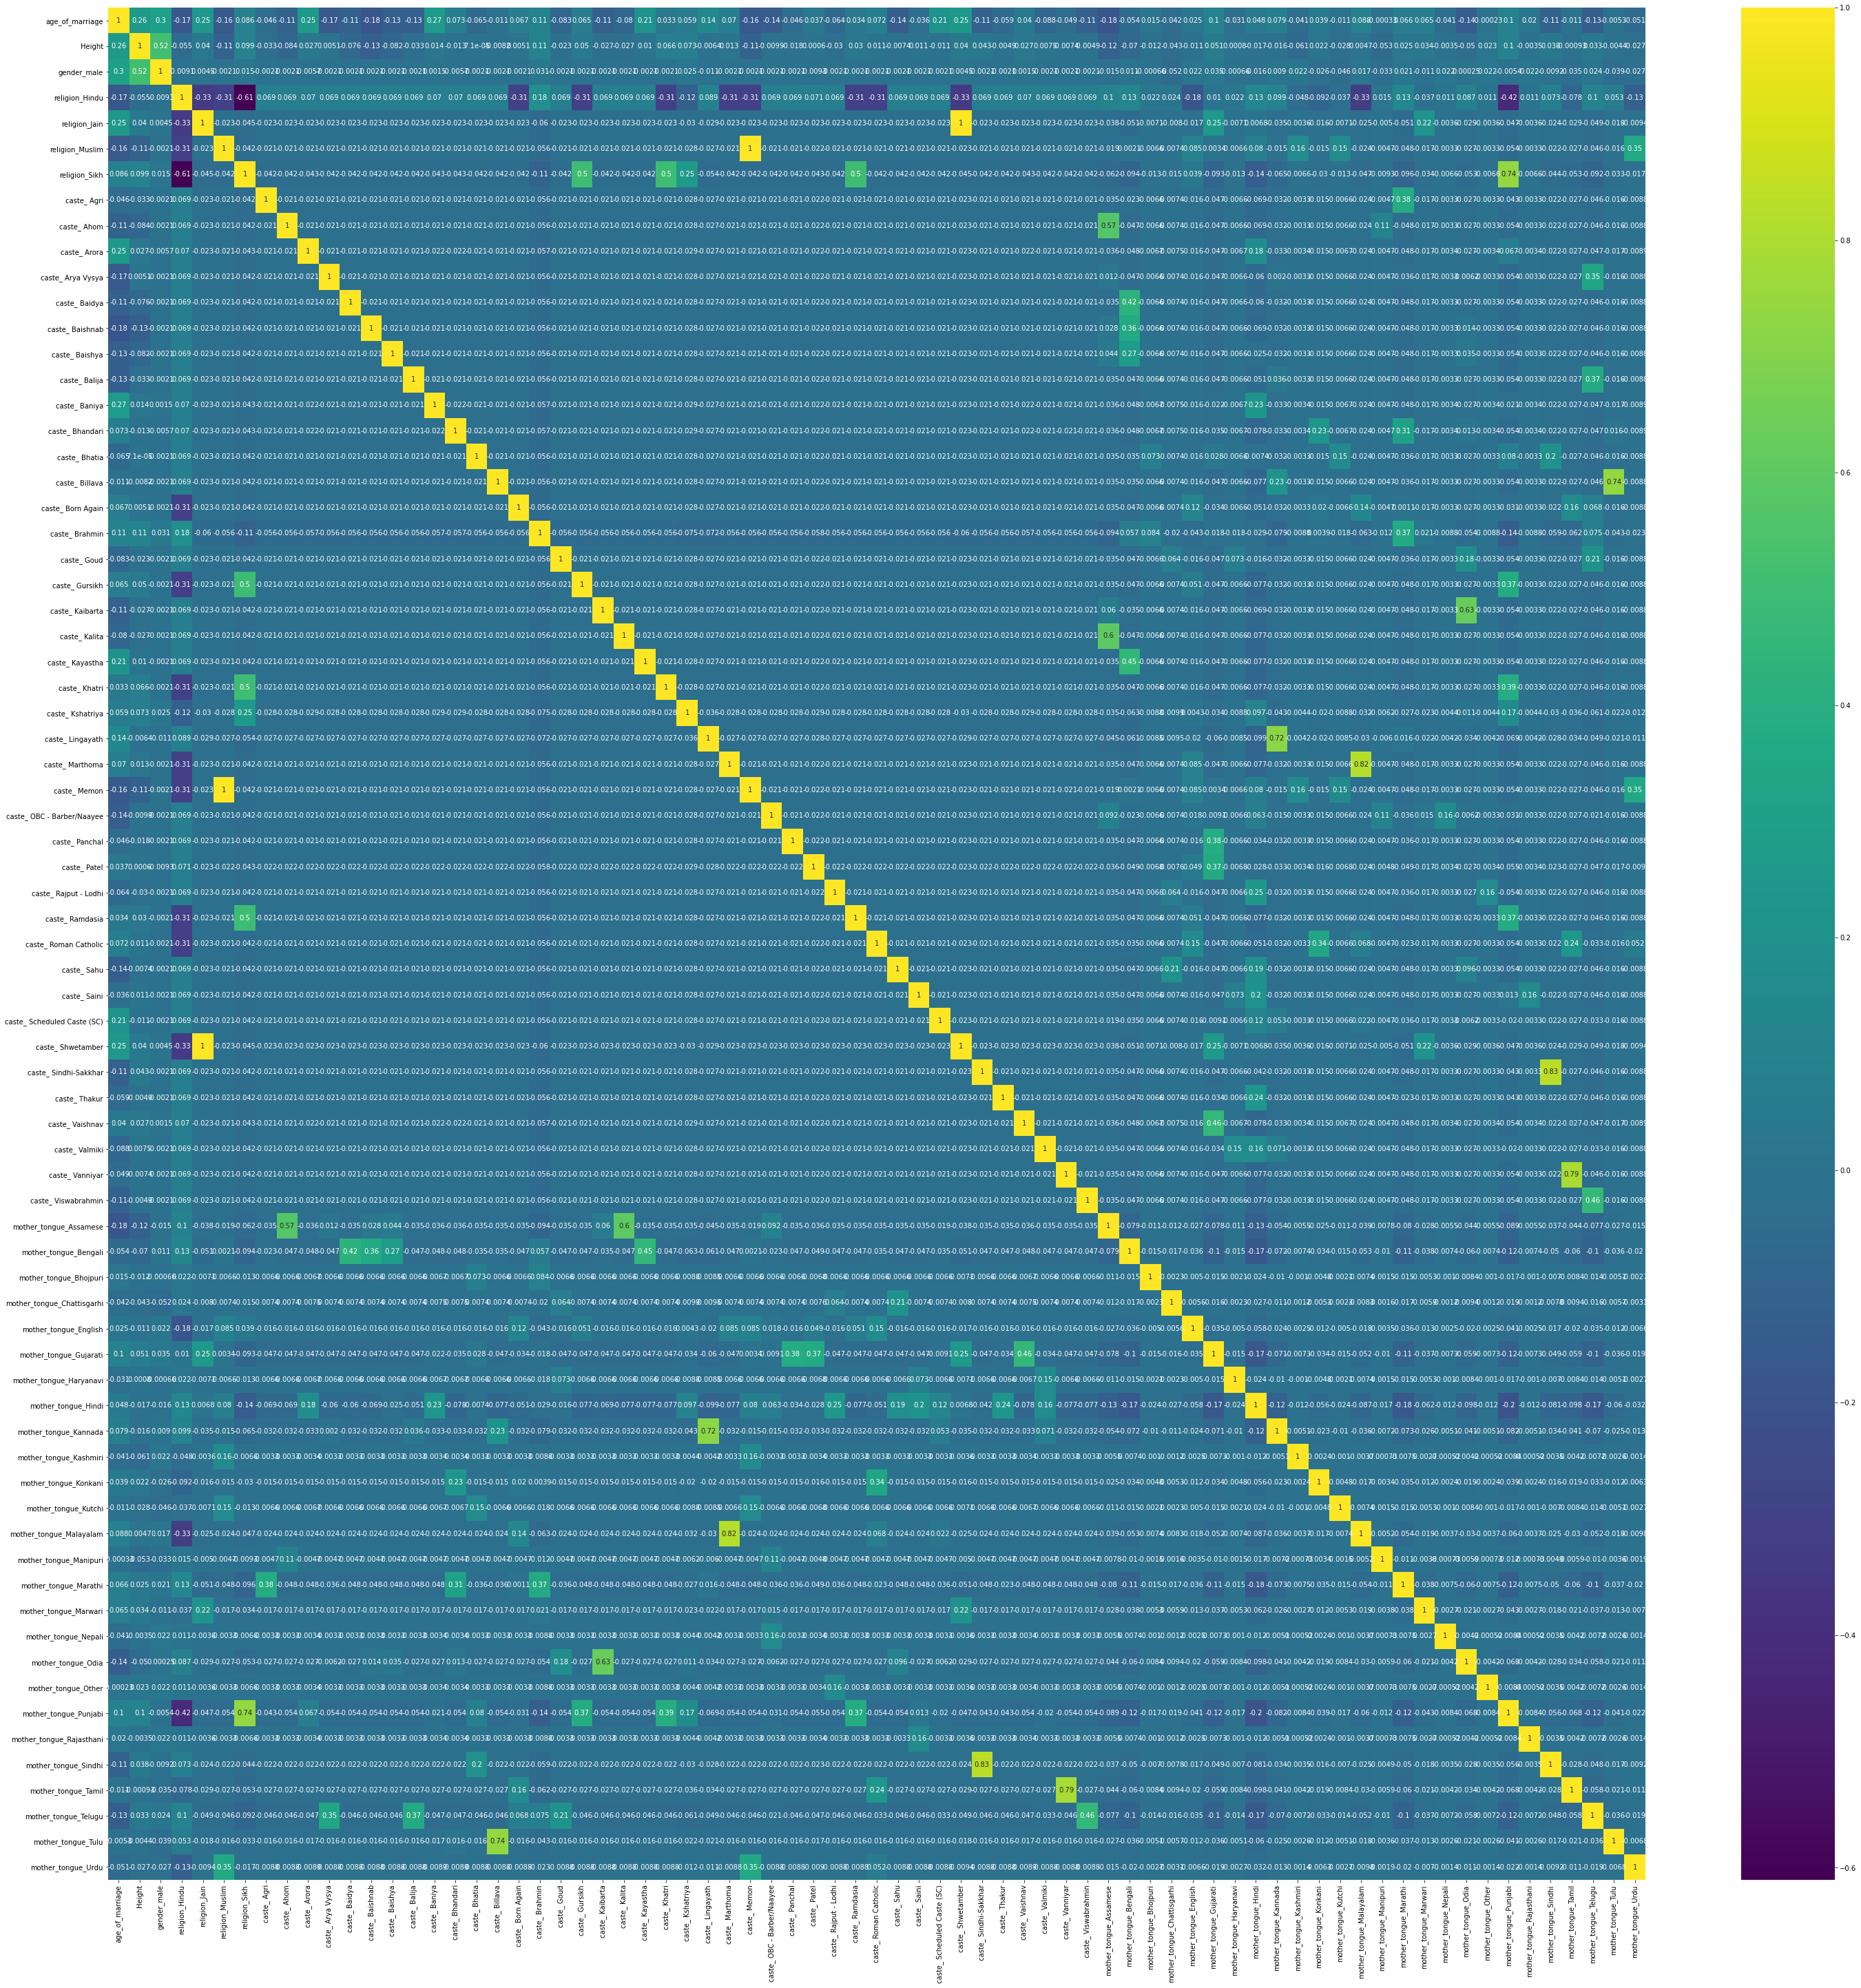

In [35]:
corr_matrix = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix,annot=True,cmap='viridis')

In [36]:
pd.set_option('display.max_rows',None)
pd.DataFrame(df.corr()['age_of_marriage'])

,age_of_marriage
age_of_marriage,1.000000
Height,0.263879
gender_male,0.296401
religion_Hindu,-0.173757
religion_Jain,0.248381
religion_Muslim,-0.164686
religion_Sikh,0.086476
caste_ Agri,-0.045550
caste_ Ahom,-0.109198
caste_ Arora,0.254864


**Observations:** There seems to be a case of multicollinarity among the feature but these features are important to the model.

## 4. Model Building

In [37]:
df.shape

(1932, 73)

In [38]:
#Let's seperate our dependent and independent variables for training and validation
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [39]:
X.head()

,Height,gender_male,religion_Hindu,religion_Jain,religion_Muslim,religion_Sikh,caste_ Agri,caste_ Ahom,caste_ Arora,caste_ Arya Vysya,...,mother_tongue_Nepali,mother_tongue_Odia,mother_tongue_Other,mother_tongue_Punjabi,mother_tongue_Rajasthani,mother_tongue_Sindhi,mother_tongue_Tamil,mother_tongue_Telugu,mother_tongue_Tulu,mother_tongue_Urdu
1,170.18,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170.18,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,152.40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,165.10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,165.10,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
Y.head()

1    32.0
2    32.0
3    30.0
4    30.0
5    29.0
Name: age_of_marriage, dtype: float64

In [41]:
#Splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1352, 72)
(580, 72)
(1352,)
(580,)


### 4.1 Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.6932798853909834

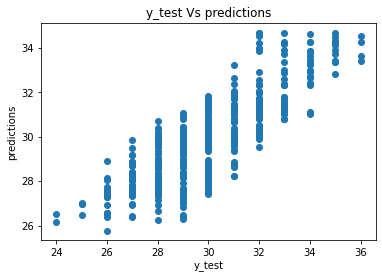

In [45]:
plt.scatter(y_test,y_pred)
plt.title('y_test Vs predictions')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


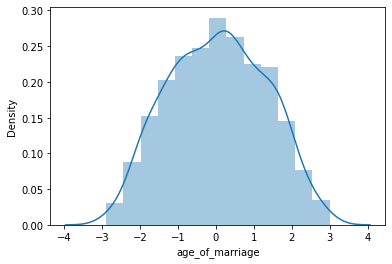

In [46]:
sns.distplot(y_test-y_pred)
plt.show()

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0591721862741186
MSE: 1.6086795299932544
RMSE: 1.268337309233334


In [48]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-1.6928799660098002


### 4.2 Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [50]:
ridge_pred = ridge_reg.predict(X_test)

In [51]:
score = r2_score(y_test,ridge_pred)
score

0.6937944832507545

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


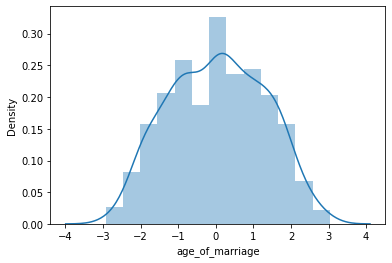

In [52]:
sns.distplot(y_test-ridge_pred)
plt.show()

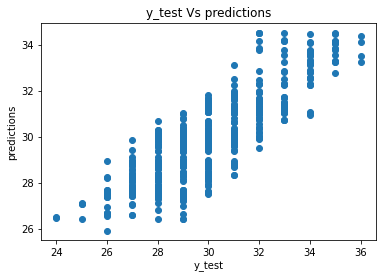

In [53]:
plt.scatter(y_test,ridge_pred)
plt.title('y_test Vs predictions')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

MAE: 1.0602566056961469
MSE: 1.605980577418046
RMSE: 1.2672728898773327


In [55]:
mse = cross_val_score(ridge_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.42668e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.94275e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


-1.6871467842535186


### 4.2 Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,25,30,35,40,45,50,55,100]}
lasso_reg = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.6441751917857, tolerance: 0.5407467160037004
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.7689710574139, tolerance: 0.5099966697502313
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440.6800920629785, tolerance: 0.5198214417744915
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\lin

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   25, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [57]:
lasso_pred = lasso_reg.predict(X_test)

In [58]:
score = r2_score(y_test,lasso_pred)
score

0.6923917487042208

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


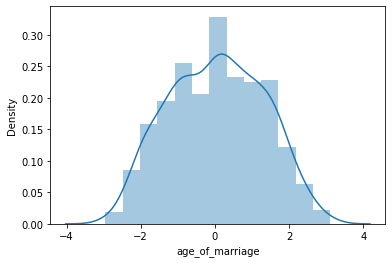

In [59]:
sns.distplot(y_test-lasso_pred)
plt.show()

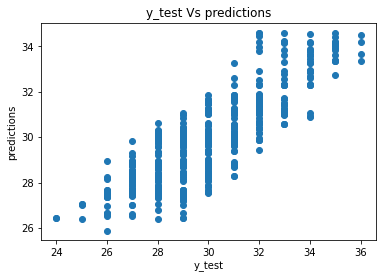

In [60]:
plt.scatter(y_test,lasso_pred)
plt.title('y_test Vs predictions')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

MAE: 1.0616105239587017
MSE: 1.6133376115463745
RMSE: 1.2701722763256857


In [62]:
mse = cross_val_score(lasso_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.74979784462363, tolerance: 0.4259739583333338
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.8994068515455, tolerance: 0.4210663583815029
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.06954399816453, tolerance: 0.4441417341040458
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\l

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.6128622280778, tolerance: 0.41349433526011525
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.56736303075684, tolerance: 0.40126658959537553
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.90679842982377, tolerance: 0.40867398843930686
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklear

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.90452292448515, tolerance: 0.4305537572254335
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.35071087116023, tolerance: 0.42518335260115586
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.7327872877721, tolerance: 0.40582782909930715
  model = cd_fast.enet_coordinate_descent(
c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\sklearn\l

-1.686193838346226


### 4.2 RandomForest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [64]:
#Hyperparameter optimization using RandomizedSearchCV

#Number of trees in the model
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [65]:
from sklearn.model_selection import RandomizedSearchCV
#Create the random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=1)

In [67]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
predictions = rf_random.predict(X_test)

In [69]:
score = r2_score(y_test,predictions)
score

0.7417675819759957

In [70]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(rf_random,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s
[CV] END max_depth=25, max_features

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.3s
[CV] END max_depth=5, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_fea

c:\users\mahe\anaconda3\envs\marriage\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


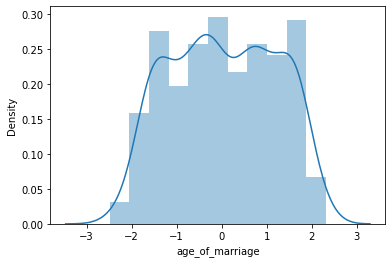

In [71]:
sns.distplot(y_test-predictions)
plt.show()

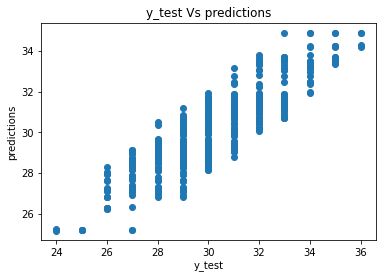

In [72]:
plt.scatter(y_test,predictions)
plt.title('y_test Vs predictions')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0039831977230322
MSE: 1.3543722275450172
RMSE: 1.1637749900840013


RandomForest performs the best, therefore we'll use it for model deployment!

## 5. Pickle File

In [74]:
#Write to disk to use it any number of times
import pickle 
file = open('marriage.pkl','wb')
pickle.dump(rf_random,file)
file.close()

In [75]:
loaded_model = pickle.load(open('marriage.pkl','rb'))
final_pred = loaded_model.predict(X_test)
print('Mean Absolte Error:',metrics.mean_absolute_error(y_test,final_pred))

Mean Absolte Error: 1.0039831977230322
